## WEEK-2 Assignment
Fill the missing places wherever TO DO is mentioned and also understnad what has been done properly


**Also give explanation about each graph and what all you understood about it by adding a text cell below the respective graph**

Do not use Chatgpt . It is a simple assignment. Make a copy of this colab notebook and do your changes and submit it as `Assignment2_yourrollno.ipnyb`


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

TICKERS = ["DMART.NS", "TRENT.NS", "TEJASNET.NS"] #you can choose assets of your own wish

df = yf.download(TICKERS, period="3y")
prices = df.xs("Close", axis=1, level=0)

prices = prices.fillna(method="ffill").dropna()
prices.head()


/tmp/ipython-input-3200811822.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKERS, period="3y")
[*********************100%***********************]  3 of 3 completed
/tmp/ipython-input-3200811822.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method="ffill").dropna()


Ticker,DMART.NS,TEJASNET.NS,TRENT.NS
Date,,,
2022-12-26,4036.600098,558.542297,1353.405151
2022-12-27,4074.600098,574.933411,1342.787231
2022-12-28,4017.750000,576.677124,1342.338623
2022-12-29,4178.299805,566.563477,1344.531982
2022-12-30,4068.750000,576.278503,1347.273682


In [5]:
log_returns = np.log(prices / prices.shift(1))
log_returns.dropna()     #TO DO : calculate log return
log_returns.tail()


Ticker,DMART.NS,TEJASNET.NS,TRENT.NS
Date,,,
2025-12-19,0.016446,0.003792,0.007958
2025-12-22,-0.000236,0.008976,0.034978
2025-12-23,0.002511,0.001543,-0.004145
2025-12-24,-0.007341,-0.004305,0.023636
2025-12-26,-0.003374,-0.007216,-0.001003


In [10]:
TRADING_DAYS = 252
mu = log_returns.mean() * TRADING_DAYS                     #TO DO : Calculate Expected return (annual)
cov_matrix =    log_returns.cov() * TRADING_DAYS           #TO DO : Calculate Covariance matrix

mu, cov_matrix


(Ticker
 DMART.NS      -0.021642
 TEJASNET.NS   -0.074331
 TRENT.NS       0.391438
 dtype: float64,
 Ticker       DMART.NS  TEJASNET.NS  TRENT.NS
 Ticker                                      
 DMART.NS     0.066291     0.019217  0.019159
 TEJASNET.NS  0.019217     0.215027  0.027761
 TRENT.NS     0.019159     0.027761  0.118606)

In [11]:
# step controls how finely we explore the portfolio weight space.
# step = 0.02 means weights change in increments of 2%:
# 0.00, 0.02, 0.04, ..., 1.00
# Smaller step  -> more portfolios -> higher accuracy -> slower computation
# Larger step  -> fewer portfolios -> faster but coarser approximation
step = 0.01  # You can consider some other step sizes too
weights = []   # This list will store all VALID portfolios. Each portfolio is a vector: [w1, w2, w3]


# Loop over possible values of weight for Asset 1
for w1 in np.arange(0, 1 + step, step):
    # For each w1, loop over possible values of weight for Asset 2
    for w2 in np.arange(0, 1 + step, step):
        w3 =  1-w1-w2                 # TO DO : What should be w3 in terms of w1 and w2 (Budget constraint)
        if w3>=0 :                       # TO DO : what should be the condition for the if statement so that it satisfies long-only constraint Change the tru to ypur condition
            weights.append([w1, w2, w3])

weights = np.array(weights)
print(weights.size)
#TO DO : print the no. of feasible portfolios


15348


In [12]:
# Lists to store portfolio returns and volatility
portfolio_returns = []
portfolio_volatility = []


# Loop over every feasible portfolio weight vector
for w in weights:
    ret =  np.dot(w, mu)                        # TO DO : Calculate return of Portfolio
    var =   np.dot(w, np.dot(cov_matrix, w))                      # TO DO : Calculate Volatility

    portfolio_returns.append(ret)
    portfolio_volatility.append(np.sqrt(var))

portfolio_df = pd.DataFrame(weights, columns=["w1", "w2", "w3"])
portfolio_df["Return"] = portfolio_returns
portfolio_df["Volatility"] = portfolio_volatility

portfolio_df.head()


,w1,w2,w3,Return,Volatility
0,0.0,0.00,1.00,0.391438,0.344392
1,0.0,0.01,0.99,0.386780,0.341784
2,0.0,0.02,0.98,0.382122,0.339239
3,0.0,0.03,0.97,0.377465,0.336757
4,0.0,0.04,0.96,0.372807,0.334340


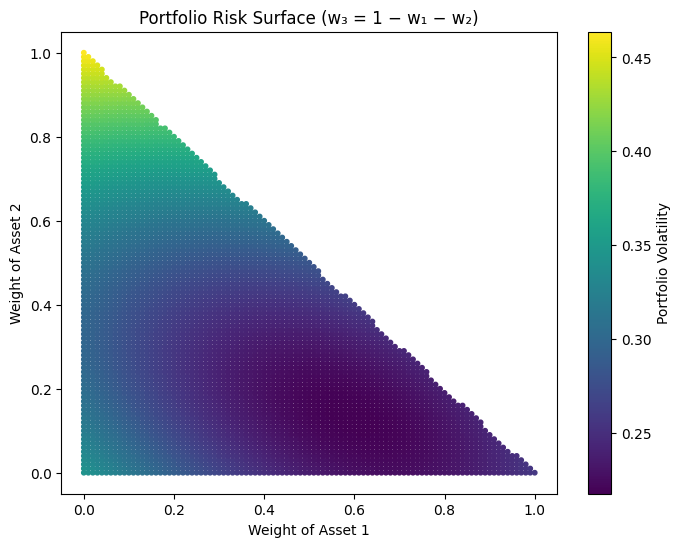

In [13]:
#Visualization for Risk Surface
plt.figure(figsize=(8,6))
sc = plt.scatter(
    portfolio_df["w1"],
    portfolio_df["w2"],
    c=portfolio_df["Volatility"],
    cmap="viridis",
    s=10
)

plt.colorbar(sc, label="Portfolio Volatility")
plt.xlabel("Weight of Asset 1")
plt.ylabel("Weight of Asset 2")
plt.title("Portfolio Risk Surface (w₃ = 1 − w₁ − w₂)")
plt.show()


In [21]:
min_var_idx =   portfolio_df["Volatility"].idxmin()                         # TO DO : Discover the Minimum Variance Portfolio
min_var_portfolio =      portfolio_df.loc[min_var_idx]               #To Do : Fill this

min_var_portfolio



,4288
w1,0.600000
w2,0.130000
w3,0.270000
Return,0.083040
Volatility,0.217484


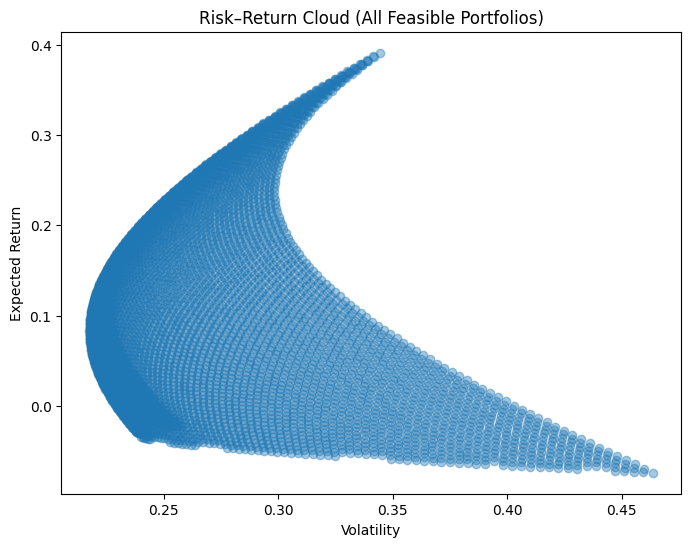

In [25]:
# Risk-Return for all Portfolios (Visualization)
plt.figure(figsize=(8,6))
plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.4
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Risk–Return Cloud (All Feasible Portfolios)")
plt.show()


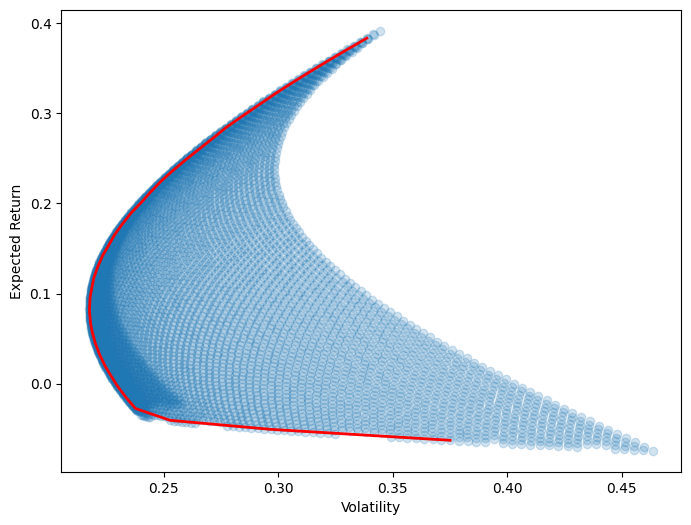

In [29]:
# To DO: Study about the red line what is it called and what it signifies
bins = np.linspace(
    portfolio_df["Return"].min(),
    portfolio_df["Return"].max(),
    40
)

frontier_risk = []
frontier_return = []

for i in range(len(bins)-1):
    mask = (portfolio_df["Return"] >= bins[i]) & (portfolio_df["Return"] < bins[i+1])
    subset = portfolio_df[mask]

    if len(subset) > 0:
        min_row = subset.loc[subset["Volatility"].idxmin()]
        frontier_risk.append(min_row["Volatility"])
        frontier_return.append(min_row["Return"])

plt.figure(figsize=(8,6))
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.2)
plt.plot(frontier_risk, frontier_return, color="red", linewidth=2)
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.show()


In [30]:
# Controlled stress test on diversification
# Increase covariance to simulate higher correlation. This mimics market stress where assets move together
stressed_cov =   cov_matrix.copy()              # TO DO : Create a copy of the original covariance matrix

for i in range(len(stressed_cov)):
    for j in range(len(stressed_cov)):
        if i != j:
            stressed_cov.iloc[i, j] *= 2    # Can change the factor from 2 to any other no. too. Try chaging to diff values


In [32]:
# List to store portfolio volatility after correlation stress
stressed_volatility = []

for w in weights:
    var =   np.dot(w, np.dot(stressed_cov, w))                         #TO DO :  Calculate Portfolio variance under stressed covariance
    stressed_volatility.append(np.sqrt(var))

portfolio_df["Stressed Volatility"] = stressed_volatility


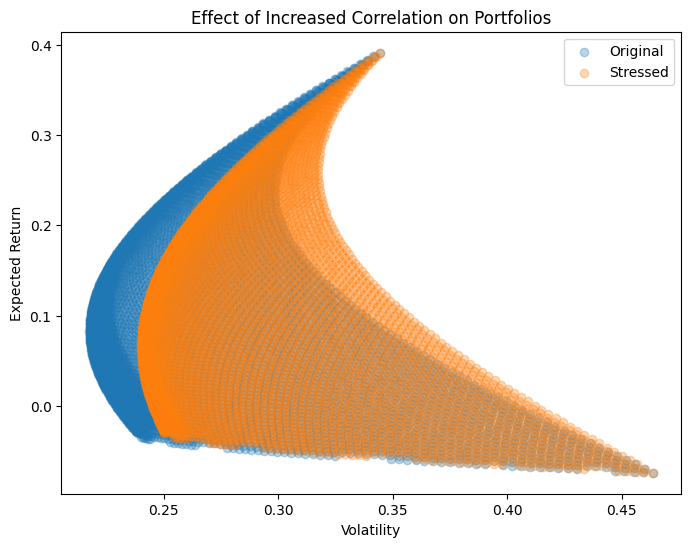

In [34]:
#TO DO : Study this graph. It represents two conditions one with normal corr and one with stressed corr
plt.figure(figsize=(8,6))

plt.scatter(
    portfolio_df["Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Original"
)

plt.scatter(
    portfolio_df["Stressed Volatility"],
    portfolio_df["Return"],
    alpha=0.3,
    label="Stressed"
)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Effect of Increased Correlation on Portfolios")
plt.legend()
plt.show()


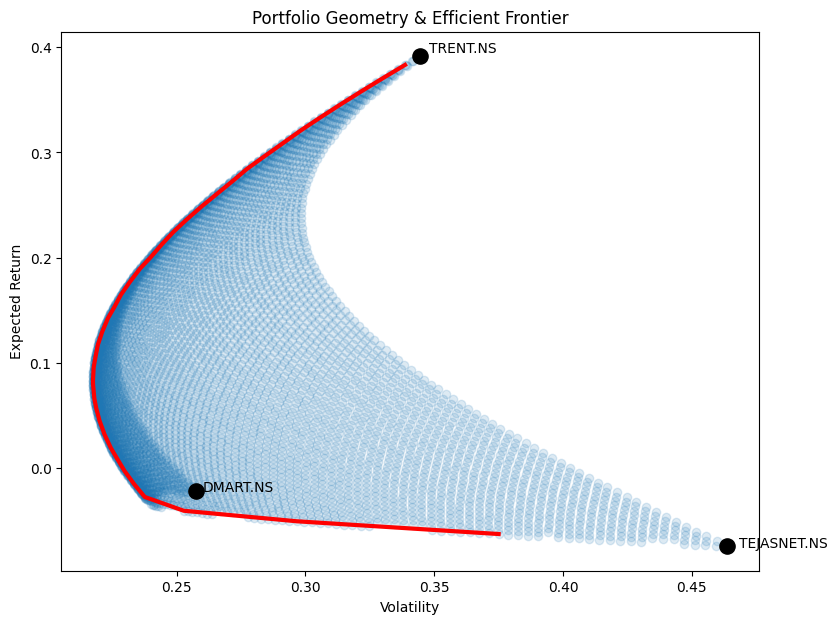

In [37]:
asset_vol =   np.sqrt(np.diag(cov_matrix))                     # TO DO : Compute individual asset volatility (annualized)
asset_vol = pd.Series(asset_vol, index=mu.index)
#Visualization
#TO DO : study this graph
plt.figure(figsize=(9,7))

# Portfolios
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], alpha=0.15)

# Efficient Frontier
plt.plot(frontier_risk, frontier_return, color="red", linewidth=3)

# Assets
plt.scatter(asset_vol, mu, s=120, color="black")
for asset in mu.index:
    plt.text(asset_vol[asset]*1.01, mu[asset]*1.01, asset)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Portfolio Geometry & Efficient Frontier")
plt.show()
